<a href="https://colab.research.google.com/github/koDELLL/MachineLearning/blob/main/WEEK%209/Classification_model_SVM_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Untuk mengabilkan dataset dari google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Evaluation Metrics:
Accuracy: 0.92
Precision: 0.92
Recall: 0.91
F1 Score: 0.91
AUC: 0.98


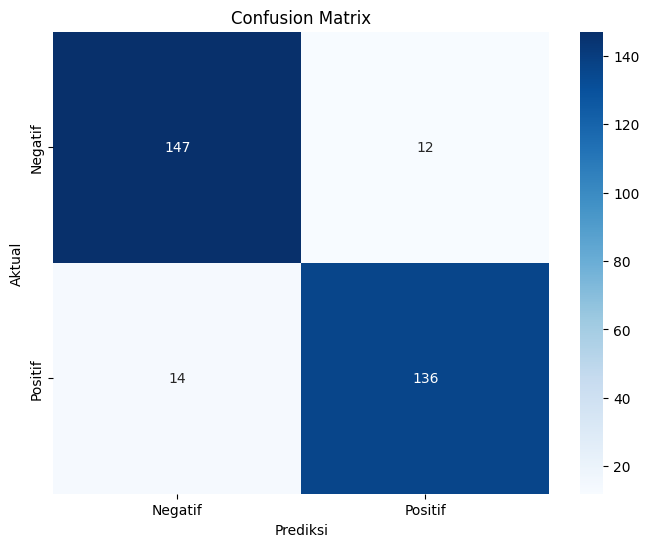

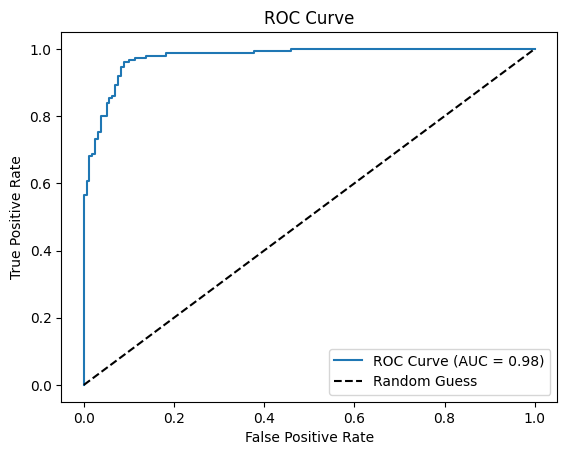

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset dari file CSV
file_path = '/content/drive/MyDrive/Dataset ML/MaterialStrength.csv'  # Lokasi file dataset
data = pd.read_csv(file_path)  # Membaca file CSV dan memuat ke dalam DataFrame Pandas

# Mengonversi fitur kategorikal x14 dan x15 menjadi numerik menggunakan LabelEncoder
data['x14_encoded'] = LabelEncoder().fit_transform(data['x14'].str.lower())  # Mengubah x14 menjadi huruf kecil dan mengenkripsi ke numerik
data['x15_encoded'] = LabelEncoder().fit_transform(data['x15'].str.lower())  # Mengubah x15 menjadi huruf kecil dan mengenkripsi ke numerik

# Menghapus kolom asli x14 dan x15 karena sudah dienkode
data.drop(['x14', 'x15'], axis=1, inplace=True)

# Melakukan standarisasi fitur numerik dengan StandardScaler
scaler = StandardScaler()  # Inisialisasi scaler untuk standarisasi
data_scaled = scaler.fit_transform(data.drop(columns=['target_feature']))  # Menstandarisasi data kecuali target

# Menyiapkan fitur (X) dan target (y)
X = pd.DataFrame(data_scaled, columns=data.drop(columns=['target_feature']).columns)  # Fitur yang sudah diskalakan
y = (data['target_feature'] > data['target_feature'].median()).astype(int)  # Mengonversi target menjadi label biner berdasarkan median

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # Pembagian 70% latih, 30% uji

# Inisialisasi dan pelatihan model SVM
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)  # Inisialisasi SVM dengan kernel linear
svm_classifier.fit(X_train, y_train)  # Melatih model SVM dengan data latih

# Membuat prediksi dan probabilitas
y_pred = svm_classifier.predict(X_test)  # Prediksi pada data uji
y_prob = svm_classifier.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif

# Evaluasi model dengan berbagai metrik
accuracy = accuracy_score(y_test, y_pred)  # Menghitung akurasi
precision = precision_score(y_test, y_pred)  # Menghitung presisi
recall = recall_score(y_test, y_pred)  # Menghitung recall
f1 = f1_score(y_test, y_pred)  # Menghitung skor F1
auc = roc_auc_score(y_test, y_prob)  # Menghitung AUC
conf_matrix = confusion_matrix(y_test, y_pred)  # Membuat matriks kebingungan

# Menampilkan metrik evaluasi
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")

# Visualisasi matriks kebingungan
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])  # Membuat heatmap untuk matriks kebingungan
plt.xlabel('Prediksi')  # Label untuk sumbu X
plt.ylabel('Aktual')  # Label untuk sumbu Y
plt.title('Confusion Matrix')  # Judul grafik
plt.show()

# Plot Kurva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)  # Menghitung nilai False Positive Rate dan True Positive Rate
plt.figure()  # Membuat figure baru
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')  # Plot kurva ROC
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Menambahkan garis acuan
plt.xlabel('False Positive Rate')  # Label untuk sumbu X
plt.ylabel('True Positive Rate')  # Label untuk sumbu Y
plt.title('ROC Curve')  # Judul grafik
plt.legend()  # Menampilkan legenda
plt.show()
